# Japan Trade Statistics
In this notebook, I will focus on the exploration of data concerning Japan trade.
I will compare the trend of trade volume in years and the difference among countries.

The data comes from https://www.kaggle.com/zanjibar/japan-trade-statistics

## Modules

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import sys

## Data

What data I have

In [5]:
sorted(os.listdir("data/"))

['country_eng.csv',
 'custom.csv',
 'hs2_eng.csv',
 'hs4_eng.csv',
 'hs6_eng.csv',
 'hs9_eng.csv',
 'year_1988_2015.csv',
 'ym_custom_2016.csv',
 'ym_custom_latest.csv']

Some code book

country_eng.csv

In [6]:
country = pd.read_csv("data/country_eng.csv")

In [8]:
country.head(2)

,Country,Country_name,Area
0,103,Republic_of_Korea,Asia
1,104,North_Korea,Asia


It is dictionary to map the country code to the English name and area

hs2_eng.csv

In [17]:
hs2_eng = pd.read_csv("data/hs2_eng.csv")

In [18]:
hs2_eng.tail()

,hs2,hs2_name
92,93,Arms and ammunition; parts and accessories the...
93,94,Furniture; bedding mattresses mattress suppo...
94,95,Toys games and sports requisites; parts and a...
95,96,Miscellaneous manufactured articles.
96,97,Works of art collectors' pieces and antiques.


01-05  Animal & Animal Products<br>
06-15  Vegetable Products<br>
16-24  Foodstuffs<br>
25-27  Mineral Products<br>
28-38  Chemicals & Allied Industries<br>
39-40  Plastics / Rubbers<br>
41-43  Raw Hides, Skins, Leather, & Furs<br>
44-49  Wood & Wood Products<br>
50-63  Textiles<br>
64-67  Footwear / Headgear<br>
68-71  Stone / Glass<br>
72-83  Metals<br>
84-85  Machinery / Electrical<br>
86-89  Transportation<br>
90-97  Miscellaneous<br>

http://www.foreign-trade.com/reference/hscode.htm

hs4_eng.csv

In [9]:
hs4_eng = pd.read_csv("data/hs4_eng.csv")

In [14]:
hs4_eng.tail(5)

,hs4,hs4_name
1219,9702,Original_engravings__prints_and_lithographs
1220,9703,Original_sculptures_and_statuary__in_any_material
1221,9704,Postage_or_revenue_stamps__stamp-postmarks__fi...
1222,9705,Collections_and_collectors'_pieces_of_zoologic...
1223,9706,Antiques_of_an_age_exceeding_one_hundred_years


the hs4_eng is a sub category of hs2<br>
I will stick to hs2_eng first

### Some real trade data

I will first focus on year_1988_2015.csv

In [20]:
year_1988_2015 = pd.read_csv("data/year_1988_2015.csv")

Size, shape, type, features, missing...

In [24]:
year_1988_2015.head()

,exp_imp,Year,Country,Unit1,Unit2,QY1,QY2,VY,hs2,hs4,hs6,hs9
0,1,1988,210,NaN,NO,0,3,25706,1,101,10111,10111000
1,1,1988,104,NaN,NO,0,4,5600,1,101,10119,10119000
2,1,1988,106,NaN,NO,0,6,9600,1,101,10119,10119000
3,1,1988,105,NaN,NO,0,1,1230,1,102,10290,10290000
4,1,1988,304,NaN,NO,0,2,3500,1,102,10290,10290000


In [23]:
year_1988_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601602 entries, 0 to 6601601
Data columns (total 12 columns):
exp_imp    int64
Year       int64
Country    int64
Unit1      object
Unit2      object
QY1        int64
QY2        int64
VY         int64
hs2        int64
hs4        int64
hs6        int64
hs9        int64
dtypes: int64(10), object(2)
memory usage: 604.4+ MB


Which are useful?

Year<br>
Country<br>
VY is a value of goods which was traded<br>
hs2 is a top category which was categorized hierarchically by HS code.<br>
hs4 is a second categorization as well as hs2<br>
hs6 is a third one<br>

Filter features 

In [26]:
columns = ["Year", "Country", "VY", "hs2", "hs4"]
year_data = year_1988_2015[columns]

In [27]:
year_data.head(2)

,Year,Country,VY,hs2,hs4
0,1988,210,25706,1,101
1,1988,104,5600,1,101


Then we can start to explore based on the year_data

## Exploration

### Quetions

1.Trend of total # of trade <br>
2.Does Japan trade more with Asia or other continents<br>
3.What is the structure of trading, which good dominate, is that changing?<br>
4.Difference when trade with different continents<br>

I will try to visualize and answer the four questions above 

#### 1.Trend of total # of trade 

In [41]:
year_sum = year_data.groupby(["Year"])["VY"].sum()
year_sum = year_sum.reset_index()

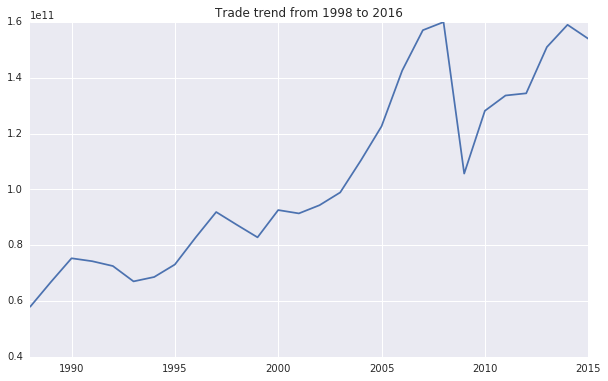

In [75]:
# Line plot
fig, ax = plt.subplots(figsize = [10,6])

ax.plot(year_sum["Year"], year_sum["VY"], zorder=10);
ax.grid(True, zorder=5)
plt.xlim([year_sum.ix[0,"Year"], year_sum.ix[year_sum.shape[0]-1,"Year"]]);
plt.title("Trade trend from 1998 to 2016");

From this graph, we see a upper trend of trade of Japan. However, an obvious downturn happens at 2008 because the worldwide financial crisis. Japan start to revive from the crisis quickly in about an year and spend about 5 years to reach the previous peak of trade value 

### 2.Does Japan trade more with Asia or other continents

Then, we start to have a look at the trading preference of Japan to different continents

We need to build a dictionary first to map the country to coninent

In [78]:
country.head(2)

,Country,Country_name,Area
0,103,Republic_of_Korea,Asia
1,104,North_Korea,Asia


In [ ]:
# create country map
country_map = pd.Series(country["Area"]) 
country_map.index=country["Country"]

# create area data
year_data["Area"] = country_map[year_data["Country"]].tolist()
targetarea = [x not in ["Special_Area", "Integrated_Hozei_Ar_Special_Area"] for x in year_data["Area"]]
area_data = year_data.ix[targetarea,:] \
            .groupby(["Year", "Area"])["VY"].sum()

In [129]:
# plot area comparisons

Year  Area                          
1988  Africa                             1327875423
      Asia                              17326845717
      Central_and_East_Europe_Russia      891789164
      Middle_East                        3450812443
      Middle_and_South_America           2256697109
      North_America                     18780982518
      Oceania                            2694989957
      Western_Europe                    11119006295
1989  Africa                             1343302277
      Asia                              20230236047
      Central_and_East_Europe_Russia      982304205
      Middle_East                        4126455094
      Middle_and_South_America           2507333163
      North_America                     21589083910
      Oceania                            3319288671
      Western_Europe                    12617907260
1990  Africa                             1389147431
      Asia                              22617330566
      Central_and_East_Euro